 
# Team 63 Exploratory Data Analysis : Demographic County Data
## Preliminary

 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Info about the Texas Demographic Data
df_demo=pd.read_csv('data/cc-est2019-alldata-48.csv')
print('Demographic: ', df_demo.shape, df_demo.columns.tolist())


Demographic:  (57912, 80) ['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE', 'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE', 'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE', 'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE', 'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE', 'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE', 'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE', 'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE', 'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE', 'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE', 'HWAC_MALE', 'HWAC_FEMALE', 'HBAC_MALE', 'HBAC_FEMALE', 'HIAC_MALE',

In [3]:
df_demo.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,48,1,Texas,Anderson County,1,0,58458,35521,22937,...,5784,2707,321,129,182,88,188,34,82,28
1,50,48,1,Texas,Anderson County,1,1,3135,1566,1569,...,385,313,22,27,13,9,8,7,3,2
2,50,48,1,Texas,Anderson County,1,2,3258,1729,1529,...,375,324,17,16,12,11,1,7,9,5
3,50,48,1,Texas,Anderson County,1,3,3156,1573,1583,...,283,315,21,17,11,11,3,3,2,4
4,50,48,1,Texas,Anderson County,1,4,3107,1676,1431,...,324,255,7,12,11,13,4,1,2,2


In [4]:
# Look for unnecessary columns, like the ones with the same State info repeated
unique_cols = [c for c in list(df_demo) if len(df_demo[c].unique()) == 1]
df_demo[unique_cols].head()

,SUMLEV,STATE,STNAME
0,50,48,Texas
1,50,48,Texas
2,50,48,Texas
3,50,48,Texas
4,50,48,Texas


In [6]:
# Drop the unnecessary columns
#df_demo.drop(['SUMLEV', 'STATE', 'STNAME'],axis=1)
# According to the County Characteristics, year 1 is the 2010 Census Population and 
# years 2&3 are estimates (base and estimate) for 2010,
# years 4-12 represent Population estimates for years 2011 - 2019.  
# I'm going to drop years 2 and 3 and change the entry to the the year of estimation
notneeded = df_demo[(df_demo['YEAR']==2) | (df_demo['YEAR']==3)].index
df_demo.drop(notneeded, inplace=True)
convert_year_nums = {'YEAR': {1:2010, 4:2011, 5:2012, 6:2013, 7:2014, 8:2015, 
                             9:2016, 10:2017, 11:2018, 12:2019}}
df_demo.replace(convert_year_nums, inplace=True)
df_demo['YEAR'].unique()


array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [7]:
#Number of counties in the dataset 
print('Total number of Texas Counties in dataset: ', df_demo.groupby('COUNTY').ngroups)

Total number of Texas Counties in dataset:  254


In [10]:
df_demo['CTYNAME']=df_demo['CTYNAME'].str.replace(' County', '')
df_demo['CTYNAME'].head()

0    Anderson
1    Anderson
2    Anderson
3    Anderson
4    Anderson
Name: CTYNAME, dtype: object

In [ ]:
#pull out only the country code and its associated name
County_Names = TX_counties.loc[:, 'FIPS':'FENAME']
# Merge the df_demo with the added columns from County_Name on FIPS ... County Code
df_demo_counties = pd.merge(left=df_demo, right=County_Names, left_on='COUNTY', right_on='FIPS')
df_demo_counties.head()

In [12]:
# Rename County to CountyID and FENAME to COUNTY
df_demo = df_demo.rename(columns={'COUNTY':'COUNTYID', 'CTYNAME': 'COUNTY'})
df_demo.columns.tolist()

['SUMLEV',
 'STATE',
 'COUNTYID',
 'STNAME',
 'COUNTY',
 'YEAR',
 'AGEGRP',
 'TOT_POP',
 'TOT_MALE',
 'TOT_FEMALE',
 'WA_MALE',
 'WA_FEMALE',
 'BA_MALE',
 'BA_FEMALE',
 'IA_MALE',
 'IA_FEMALE',
 'AA_MALE',
 'AA_FEMALE',
 'NA_MALE',
 'NA_FEMALE',
 'TOM_MALE',
 'TOM_FEMALE',
 'WAC_MALE',
 'WAC_FEMALE',
 'BAC_MALE',
 'BAC_FEMALE',
 'IAC_MALE',
 'IAC_FEMALE',
 'AAC_MALE',
 'AAC_FEMALE',
 'NAC_MALE',
 'NAC_FEMALE',
 'NH_MALE',
 'NH_FEMALE',
 'NHWA_MALE',
 'NHWA_FEMALE',
 'NHBA_MALE',
 'NHBA_FEMALE',
 'NHIA_MALE',
 'NHIA_FEMALE',
 'NHAA_MALE',
 'NHAA_FEMALE',
 'NHNA_MALE',
 'NHNA_FEMALE',
 'NHTOM_MALE',
 'NHTOM_FEMALE',
 'NHWAC_MALE',
 'NHWAC_FEMALE',
 'NHBAC_MALE',
 'NHBAC_FEMALE',
 'NHIAC_MALE',
 'NHIAC_FEMALE',
 'NHAAC_MALE',
 'NHAAC_FEMALE',
 'NHNAC_MALE',
 'NHNAC_FEMALE',
 'H_MALE',
 'H_FEMALE',
 'HWA_MALE',
 'HWA_FEMALE',
 'HBA_MALE',
 'HBA_FEMALE',
 'HIA_MALE',
 'HIA_FEMALE',
 'HAA_MALE',
 'HAA_FEMALE',
 'HNA_MALE',
 'HNA_FEMALE',
 'HTOM_MALE',
 'HTOM_FEMALE',
 'HWAC_MALE',
 'HWAC_FEM

Instead of initially looking at all 254 counties, I want to focus on a smaller list of counties.

In [14]:

# Since only have shutdown information from only a few of the 254 counties in TX
# We only want to look at the information for those counties
spec_counties = ['Bell','Bexar','Bowie','Brazoria','Brazos','Harris','Castro',
                 'Chambers','Collin','Comal','Dallas','Denton','Ellis','El Paso']
df_spec_counties = df_demo[df_demo['COUNTY'].isin(spec_counties)].reset_index(drop=True)
df_spec_counties.shape



(2660, 80)

In [16]:
print('Total number of Special Texas Counties in dataset: ', df_spec_counties.groupby('COUNTY').ngroups)
df_spec_counties['COUNTY'].unique().tolist()

Total number of Special Texas Counties in dataset:  14


['Bell',
 'Bexar',
 'Bowie',
 'Brazoria',
 'Brazos',
 'Castro',
 'Chambers',
 'Collin',
 'Comal',
 'Dallas',
 'Denton',
 'Ellis',
 'El Paso',
 'Harris']

In [18]:
#Group the rows by County and Year, then sum the columns so I don't have to look at the data by age group
grouped_spec_counties = df_spec_counties.groupby(['COUNTY', 'YEAR'])
df=grouped_spec_counties.sum()
# drop unnecessary columns
df = df.drop(['SUMLEV', 'STATE', 'STNAME'],axis=1).reset_index()
df.head()


,COUNTY,YEAR,COUNTYID,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,Bell,2010,513,171,620470,306928,313542,213000,212962,68780,...,58154,57082,6846,7796,2780,2864,1682,1638,786,808
1,Bell,2011,513,171,631598,312510,319088,216282,216372,70054,...,61540,60456,7156,8228,3042,2992,1560,1616,730,744
2,Bell,2012,513,171,649926,325754,324172,225638,219316,72666,...,65126,62722,7456,8448,3084,3000,1646,1746,780,742
3,Bell,2013,513,171,654056,327556,326500,226222,220210,73472,...,67208,64480,7560,8646,3130,3080,1648,1736,752,754
4,Bell,2014,513,171,660298,330636,329662,226418,220766,75552,...,69094,66340,7892,8898,3210,3156,1720,1736,786,776


In [19]:
# Population total by county
county_pop_history=df[['COUNTY', 'YEAR', 'TOT_POP']].groupby(['COUNTY','YEAR']).TOT_POP.sum().reset_index(name='TOT_POP')
fig = px.line(county_pop_history, x='YEAR', y='TOT_POP', color='COUNTY', color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Population History per Texas County",
    xaxis_title="Year",
    yaxis_title="Annual County Population")
fig.show()

In [20]:
# Population Breakdown per County
df.groupby(['COUNTY']).TOT_POP.mean().sort_values(ascending=False)

COUNTY
Harris      8915490.0
Dallas      5054200.0
Bexar       3740483.4
Collin      1808216.6
El Paso     1659562.2
Denton      1541433.2
Brazoria     685476.6
Bell         670208.4
Brazos       424111.6
Ellis        327943.0
Comal        257101.6
Bowie        186382.0
Chambers      77898.0
Castro        15766.2
Name: TOT_POP, dtype: float64

In [21]:
#since population is broken up in terms of male and female for ethnicity groups
#I want to add a total value per ethnicity groups
df['BA_All'] = df['BA_FEMALE']+df['BA_MALE'] # black only
df['WA_All'] = df['WA_FEMALE']+df['WA_MALE'] # white only
df['H_All'] = df['H_FEMALE']+df['H_MALE']    # hispanic
df['AA_All'] = df['AA_FEMALE']+df['AA_MALE'] # asian only
df['IAC_All'] = df['IAC_FEMALE']+df['IAC_MALE']# american indian or alaska native in combo
df['HBA_All'] = df['HBA_FEMALE']+df['HBA_MALE'] #hispanic or black 
df['NHBA_All'] = df['NHBA_FEMALE']+df['NHBA_MALE'] #not hispanic, black or combination

In [29]:
#minority breakdown Black Only, White Only, Hispanic Only, Asian Only, Indigeinous Only mean over the years 
#sorted by highest Black Only population
racepop = df.groupby(['COUNTY'])[['BA_All', 'WA_All', 'H_All', 'AA_All', 'IAC_All']].mean().reset_index()
racepop.head()

,COUNTY,BA_All,WA_All,H_All,AA_All,IAC_All
0,Bell,155720.4,451180.2,159586.6,21021.6,14046.6
1,Bexar,310293.2,3182725.8,2233047.2,111042.4,71937.6
2,Bowie,46262.6,131981.6,13493.6,1976.6,3468.8
3,Brazoria,93539.0,529369.6,203017.4,43517.6,9555.8
4,Brazos,47296.4,340445.2,105436.8,25216.8,5115.6


<Axes: title={'center': 'Stacked Bar Graph'}, ylabel='COUNTY'>

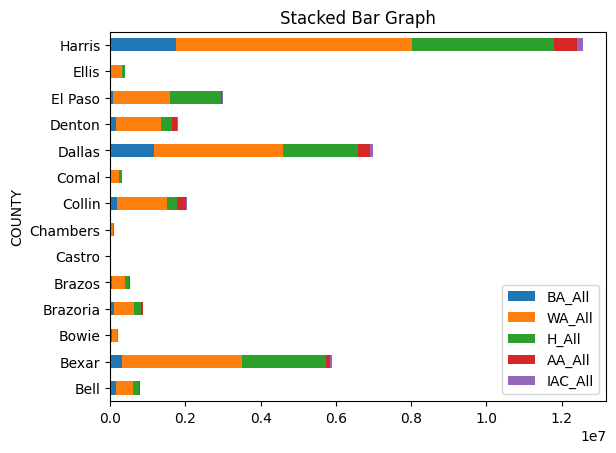

In [30]:
racepop.plot(
    x = 'COUNTY',
    kind = 'barh',
    stacked = True,
    title = 'Race breakdown by average population',
    mark_right = True)

In [26]:
country_race_pop = df.groupby(['COUNTY'])[['BA_All', 'WA_All', 'H_All', 'AA_All', 'IAC_All']].mean().reset_index()

In [ ]:
fig = px.bar(country_race_pop,  
            x='COUNTY', y = "Value", animation_frame="Year")

In [ ]:
#Non-Hispanic White and Hispanic & Black Breakdowns mean over the years
#sorted by highest Hispanic and Black population
df.groupby(['FENAME'])['NHBA_All', 'HBA_All'].mean().sort_values(by='HBA_All', ascending=False)

In [ ]:
#highest percentage of Hispanic and Black residents on average over the years
df['HBARatio']=df['HBA_All']/df['TOT_POP']
df.groupby(['FENAME'])['HBARatio'].mean().sort_values(ascending=False)

In [ ]:
grp=df.groupby(['FENAME'])
legendnames = grp.apply(lambda x: x.FENAME)
plots = grp.plot('YEAR', 'HBARatio', legend=True, ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
thecounties = list(df.FENAME.unique())
for c in thecounties: 
    df1 = df[df['FENAME']== c]
    df1.plot(x='YEAR', y='HBARatio', kind='line', ax=ax, label=c)


In [ ]:
#total Population in the counties
df.groupby(['YEAR','FENAME'])['TOT_POP'].sum().unstack().plot()

In [ ]:
#Look at the mean of the population of the counties
df.groupby(['FENAME'])['TOT_POP'].mean().plot(kind='barh')

In [ ]:

#Add Percentages Columns since the County Populations vary significantly
df['BlackOnly_Percentage'] = df['BA_All'] /df['TOT_POP']
df['WhiteOnly_Percentage'] =  df['WA_All'] /df['TOT_POP']
df['IndigenousOnly_Percentage'] =  df['IAC_All'] /df['TOT_POP']
df['HispanicsOnly_Percentage'] =  df['H_All'] /df['TOT_POP']
df['AsianOnly_Percentage'] =  df['AA_All'] /df['TOT_POP']
df['HispanicsandorBlack_Percentage'] = df['HBA_All'] /df['TOT_POP']
df[df['YEAR']==2019].describe()





In [ ]:
df.groupby(['FENAME'])['HispanicsandorBlack_Percentage'].mean().plot(kind='barh')

In [ ]:
# Black Only Percentages in County
fig, ax = plt.subplots(figsize=(10,8))
thecounties = list(df.FENAME.unique())
for c in thecounties: 
    df1 = df[df['FENAME']== c]
    df1.plot(x='YEAR', y='BlackOnly_Percentage', kind='line', ax=ax, label=c)
  

In [ ]:
# Hispanics Only Percentages in County
fig, ax = plt.subplots(figsize=(10,8))
thecounties = list(df.FENAME.unique())
for c in thecounties: 
    df1 = df[df['FENAME']== c]
    df1.plot(x='YEAR', y='HispanicsOnly_Percentage', kind='line', ax=ax, label=c)

In [ ]:
# Hispanic and Blacks Percentages in County
fig, ax = plt.subplots(figsize=(10,8))
thecounties = list(df.FENAME.unique())
for c in thecounties: 
    df1 = df[df['FENAME']== c]
    df1.plot(x='YEAR', y='HispanicsandorBlack_Percentage', kind='line', ax=ax, label=c)

In [ ]:
# White Only Percentages in County
fig, ax = plt.subplots(figsize=(10,8))
thecounties = list(df.FENAME.unique())
for c in thecounties: 
    df1 = df[df['FENAME']== c]
    df1.plot(x='YEAR', y='WhiteOnly_Percentage', kind='line', ax=ax, label=c)

In [ ]:
df.groupby(['FENAME'])['WhiteOnly_Percentage'].mean().plot(kind='barh')

Based on the analysis, the white only percentage of the counties are decreasing (significantly in Collin, Brazoria and Bexar County), while slightly in others. 
* Castro County has the highest percentage of White only residents, while Bell has the lowest percentage
* Bell has the highest percentage of Hispanic and Black residents, while Bowie has the lowest percentage